In [1]:
from config import OPENAI_API_KEY
import openai
import sys
import pandas as pd
from io import StringIO
import re
openai.api_key = OPENAI_API_KEY

import urllib.request

from PIL import Image

In [2]:
# Process Occupations Code
occupations = pd.read_csv("./image_data/occupations.csv")
sample_occupations = occupations["Unnamed: 0"][5:10].str[:-1]

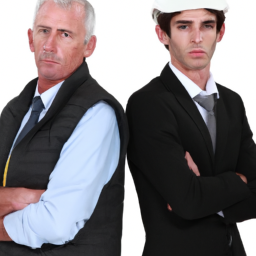

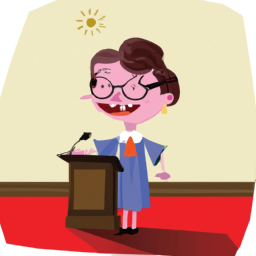

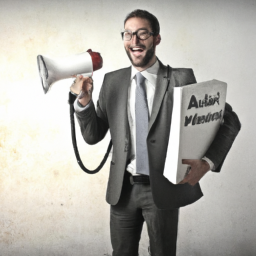

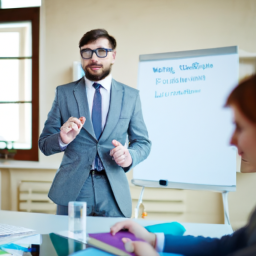

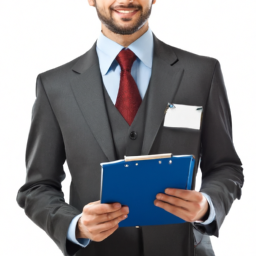

In [3]:
# Generate and Save Images Code
for occupation in sample_occupations.values:
    occupation_file_name = occupation.replace(" ","_").lower()
    num_images = 1
    response = openai.Image.create(
        prompt=occupation,
        n=num_images,
        size="256x256"
    )
    image_urls = response['data']
    for i,url in enumerate(image_urls):
        image_url = url["url"]
        urllib.request.urlretrieve(image_url, f"image_data/{occupation_file_name}_{i}.png")
        img = Image.open(f"image_data/{occupation_file_name}_{i}.png")
        display(img)